In [69]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import scipy.linalg as la
from scipy.linalg import inv
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

In [70]:
col_names = ['t','A']

In [71]:
I124 = pd.read_csv('I124 (1).prn',header=None, delim_whitespace=True, names=col_names)

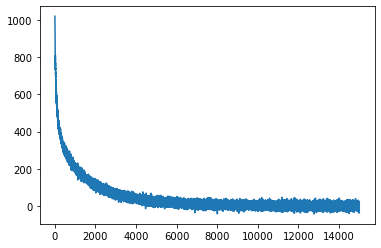

In [72]:
plt.plot(I124['t'],I124['A'])

In [73]:
def x_def(t, T2):
    return np.exp(-t/T2)

In [74]:
T2 = np.logspace(-1,3,56)

In [75]:
I124_time=I124['t'].to_numpy().reshape(-1,1)/1000

In [76]:
I124_Amp = I124['A'].to_numpy().reshape(-1,1)

In [77]:
A=x_def(time,T2)

In [78]:
X = A

In [79]:
y = I124['A'].to_numpy().reshape(-1, 1)

In [80]:
lr=LinearRegression().fit(X,y)
LR_predic=lr.predict(X)

In [81]:
len(LR_predic)

30000

In [82]:
lr.score(X,y)

0.9852784239776181

In [83]:
lr.coef_

array([[ 5.94402366e+06, -7.33488376e+07,  4.72777614e+08,
        -2.13499558e+09,  7.65025582e+09, -2.33580936e+10,
         6.36706323e+10, -1.59977344e+11,  3.78395326e+11,
        -8.52449227e+11,  1.83440885e+12, -3.75038185e+12,
         7.18618678e+12, -1.26199350e+13,  1.96418569e+13,
        -2.57145579e+13,  2.57236930e+13, -1.50401495e+13,
        -3.10956103e+12,  1.40813610e+13, -5.73042866e+12,
        -9.26964222e+12,  5.63502696e+12,  8.32641003e+12,
        -2.39962163e+12, -7.79745015e+12, -3.35837626e+12,
         3.77677248e+12,  7.37186923e+12,  2.75093235e+12,
        -1.24018092e+12, -5.16269311e+12, -4.81977614e+12,
        -3.16020006e+12,  3.41663184e+11,  1.44938565e+12,
         3.91975188e+12,  3.31588302e+12,  3.07560126e+12,
         3.21058185e+12,  1.58381413e+12, -1.36827441e+11,
         5.20872258e+10, -1.04445725e+12, -2.73120041e+12,
        -1.63166485e+12, -2.92777908e+12, -2.88532733e+12,
        -2.80435861e+12, -2.90271637e+12, -2.01694953e+1

In [84]:
coe1=lr.coef_[0]

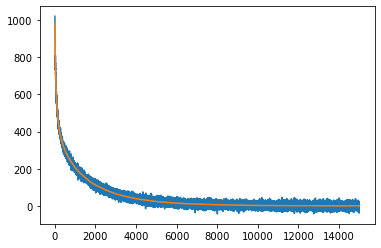

In [85]:
plt.plot(I124['t'],I124['A'])
plt.plot(I124['t'],LR_predic)

In [20]:
sklearn.metrics.mean_squared_error(y, LR_predic)

358.82123728079665

In [23]:
models_lasso_n_linear = [
    LinearRegression(positive =True),
    Lasso(max_iter=3000, positive=True)]
models_ridge = [
    Ridge(max_iter=3000, positive=True)]
models_bayes = [
    BayesianRidge()]
models_elastic = [
    ElasticNet(max_iter=3000, positive=True)]

In [24]:
parameters_Lasso_n_linear = {
    'LR': {},
    'Lasso': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20]}}
parameters_ridge = {
    'Ridge': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20]}}
parameters_bayes = {
    'BayesianRidge': {'alpha_1' : [0.0000001, 0.000001, 0.00001, 0.0001, 0.001],
        'n_iter' : [10, 50, 100, 200, 300, 500]}}
param_elastic = {
    'ElasticNet': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20],
                  'l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1]}}

Подбор гиперпараметров для линейной регрессии и Ласо

In [31]:
grid_res = []
for estimator, hyperparam in zip(models_lasso_n_linear, parameters_Lasso_n_linear.keys()):
    model = GridSearchCV(estimator,parameters_Lasso_n_linear[hyperparam]).fit(
    x_def(I124_time,T2),I124_Amp)
    grid_res.append((model.best_estimator_, model.best_score_))
grid_res

C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+04, tolerance: 8.788e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+06, tolerance: 2.819e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+06, tolerance: 

[(LinearRegression(positive=True), 0.2713274241596001),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), 0.26802959583187014)]

Ридж

In [32]:
for estimator, hyperparam in zip(models_ridge, parameters_ridge.keys()):
    model = GridSearchCV(estimator,parameters_ridge[hyperparam]).fit(
    x_def(I124_time,T2),I124_Amp)
    grid_res.append((model.best_estimator_, model.best_score_))

Байес

In [33]:
for estimator, hyperparam in zip(models_bayes, parameters_bayes.keys()):
    model = GridSearchCV(estimator,parameters_bayes[hyperparam]).fit(
     x_def(I124_time,T2),I124_Amp)
    grid_res.append((model.best_estimator_, model.best_score_))

C:\Users\albin\Anakonda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\albin\Anakonda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\albin\Anakonda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\albin\Anakonda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

ElasticNet

In [34]:
for estimator, hyperparam in zip(models_elastic,param_elastic.keys()):
    model = GridSearchCV(estimator,param_elastic[hyperparam]).fit(
    x_def(I124_time,T2),I124_Amp)
    grid_res.append((model.best_estimator_, model.best_score_))

C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+06, tolerance: 8.788e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+06, tolerance: 2.819e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+06, tolerance: 

In [35]:
grid_res

[(LinearRegression(positive=True), 0.2713274241596001),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), 0.26802959583187014),
 (Ridge(alpha=1, max_iter=3000, positive=True), 0.07274080984778222),
 (BayesianRidge(alpha_1=1e-07, n_iter=10), 0.2854864349036405),
 (ElasticNet(alpha=1e-05, l1_ratio=1e-05, max_iter=3000, positive=True),
  0.28381196524916885)]

In [36]:
def get_best_model (grid_result):
    return max(grid_result, key = lambda x: x[1])[0]

In [37]:
best_model = get_best_model(grid_res)
best_model

BayesianRidge(alpha_1=1e-07, n_iter=10)

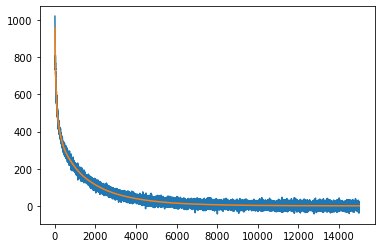

In [42]:
plt.plot(I124['t'],I124['A'])
plt.plot(I124['t'],best_model.predict(x_def(I124_time,T2)))

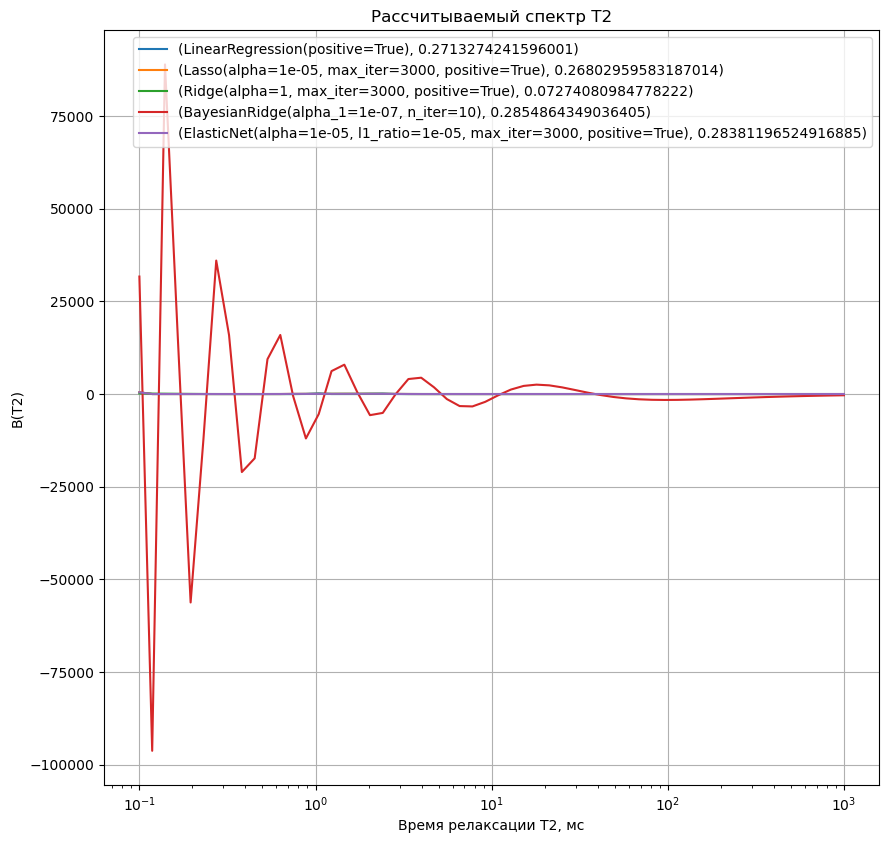

In [44]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 100)
for model in grid_res:
    spectre, = ax.plot(T2,model[0].coef_.reshape(-1))
    spectre.set_label(str(model))
ax.semilogx()
ax.set_xlabel('Время релаксации T2, мс')
ax.set_ylabel('B(T2)')
ax.set_title('Рассчитываемый спектр T2')
ax.legend()
ax.grid()

   Байесовская регрессия не дает нужный спектр, поэтому нам не подходит, ее больше использовать не будем

In [45]:
grid_res_no_bayes = grid_res.copy()
del grid_res_no_bayes[3]
best_model = get_best_model(grid_res_no_bayes)
best_model

ElasticNet(alpha=1e-05, l1_ratio=1e-05, max_iter=3000, positive=True)

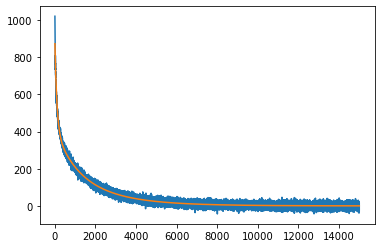

In [48]:
plt.plot(I124['t'],I124['A'])
plt.plot(I124['t'],best_model.predict(x_def(I124_time,T2)))

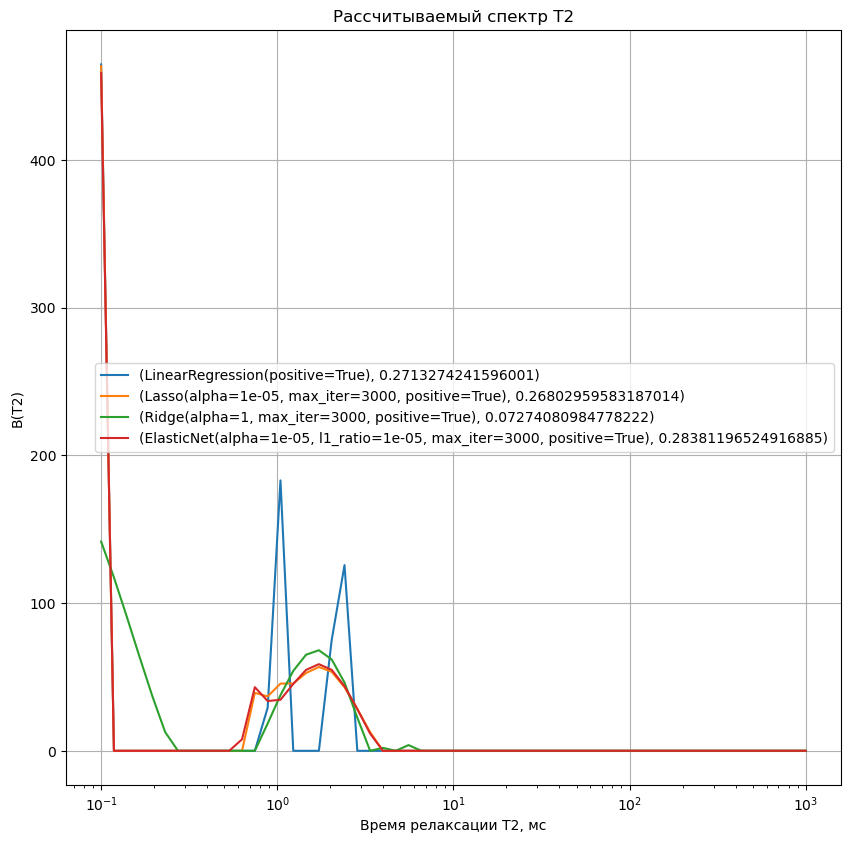

In [49]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 100)
for model in grid_res_no_bayes:
    spectre, = ax.plot(T2,model[0].coef_.reshape(-1))
    spectre.set_label(str(model))
ax.semilogx()
ax.set_xlabel('Время релаксации T2, мс')
ax.set_ylabel('B(T2)')
ax.set_title('Рассчитываемый спектр T2')
ax.legend()
ax.grid()

In [51]:
RB122 = pd.read_csv('RB122.prn',header=None, delim_whitespace=True, names=col_names)

In [52]:
RB122_time = RB122['t'].to_numpy().reshape(-1,1)/1000
RB122_Amp = RB122['A'].to_numpy().reshape(-1,1)

In [53]:
models = [
    LinearRegression(positive =True),
    Lasso(max_iter=3000, positive=True),
    Ridge(max_iter=3000, positive=True),
    ElasticNet(max_iter=3000, positive=True)]

In [54]:
parameters = {
    'LR': {},
    'Lasso': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2]},
    'Ridge': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2]},
    'ElasticNet': {'alpha': [0.00001, 0.0001, 0.001, 0.01],
                  'l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]}}

In [55]:
grid_res_RB122 = []
for estimator, hyperparam in zip(models, parameters.keys()):
    model = GridSearchCV(estimator,parameters[hyperparam]).fit(
    x_def(RB122_time, T2),RB122_Amp)
    grid_res_RB122.append((model.best_estimator_, model.best_score_))
grid_res_RB122

C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+03, tolerance: 8.588e+01
  model = cd_fast.enet_coordinate_descent(


[(LinearRegression(positive=True), -0.037675066348112504),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), -0.07353304697308552),
 (Ridge(alpha=0.01, max_iter=3000, positive=True), -0.23415429628587442),
 (ElasticNet(alpha=1e-05, max_iter=3000, positive=True), -0.10818071806016741)]

In [56]:
best_model = get_best_model(grid_res_RB122)
best_model

LinearRegression(positive=True)

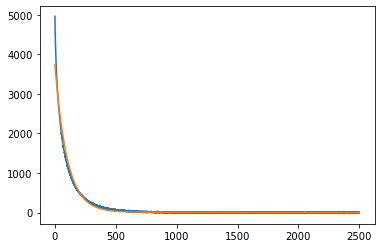

In [57]:
plt.plot(RB122['t'],RB122['A'])
plt.plot(RB122['t'],best_model.predict(x_def(RB122_time,T2)))

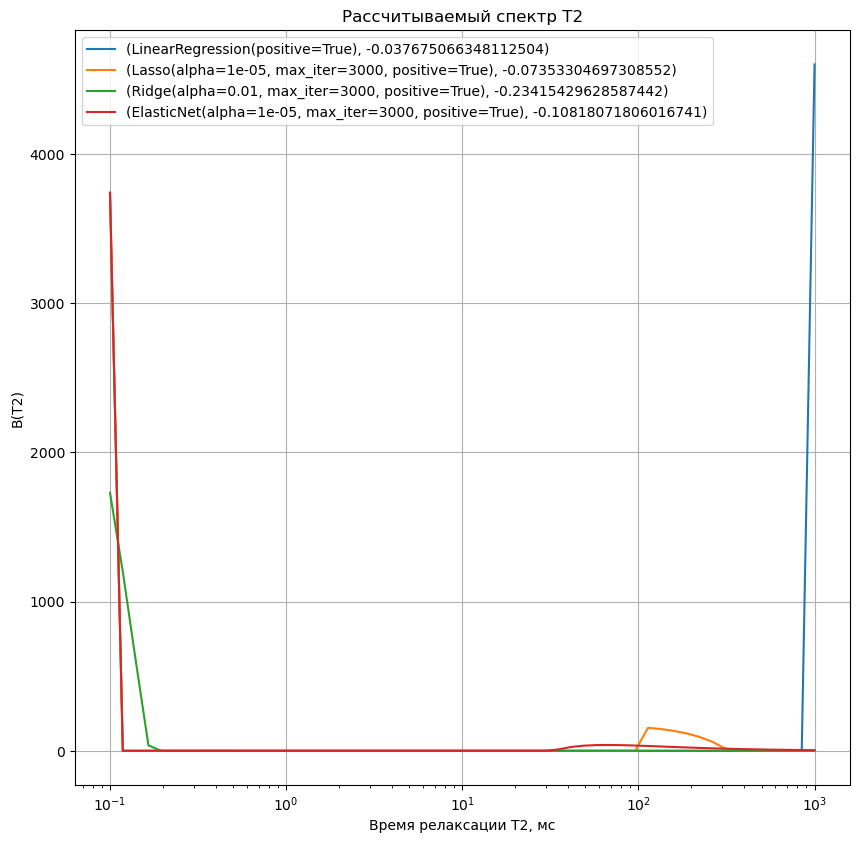

In [58]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 100)
for model in grid_res_RB122:
    spectre, = ax.plot(T2,model[0].coef_.reshape(-1))
    spectre.set_label(str(model))
ax.semilogx()
ax.set_xlabel('Время релаксации T2, мс')
ax.set_ylabel('B(T2)')
ax.set_title('Рассчитываемый спектр T2')
ax.legend()
ax.grid()

In [59]:
I4529 = pd.read_csv('I4529.prn',header=None, delim_whitespace=True, names=col_names)

In [60]:
i4529_time = I4529['t'].to_numpy().reshape(-1,1)/1000
i4529_Amp = I4529['A'].to_numpy().reshape(-1,1)

In [63]:
grid_res_i4529 = []
for estimator, hyperparam in zip(models, parameters.keys()):
    model = GridSearchCV(estimator,parameters[hyperparam]).fit(
    x_def(i4529_time, T2),i4529_Amp)
    grid_res_i4529.append((model.best_estimator_, model.best_score_))
grid_res_i4529

C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.289e+05, tolerance: 9.349e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+06, tolerance: 2.265e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\albin\Anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+06, tolerance: 

[(LinearRegression(positive=True), -8.290568371751726e+17),
 (Lasso(alpha=1e-05, max_iter=3000, positive=True), 0.3054244819604636),
 (Ridge(alpha=0.0001, max_iter=3000, positive=True), 0.0907389789273203),
 (ElasticNet(alpha=1e-05, l1_ratio=1e-05, max_iter=3000, positive=True),
  0.32026708515152874)]

In [64]:
best_model = get_best_model(grid_res_i4529)
best_model


ElasticNet(alpha=1e-05, l1_ratio=1e-05, max_iter=3000, positive=True)

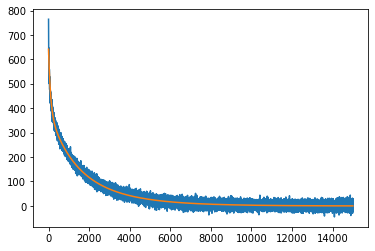

In [66]:
plt.plot(I4529['t'],I4529['A'])
plt.plot(I4529['t'],best_model.predict(x_def(i4529_time,T2)))

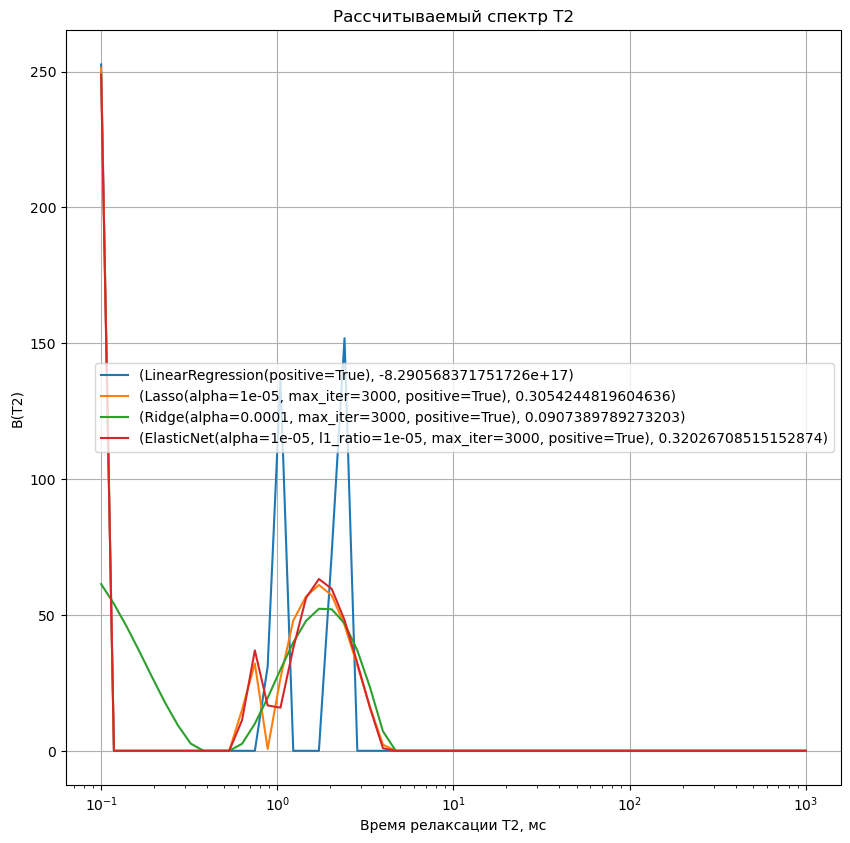

In [67]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 100)
for model in grid_res_i4529:
    spectre, = ax.plot(T2,model[0].coef_.reshape(-1))
    spectre.set_label(str(model))
ax.semilogx()
ax.set_xlabel('Время релаксации T2, мс')
ax.set_ylabel('B(T2)')
ax.set_title('Рассчитываемый спектр T2')
ax.legend()
ax.grid()